## Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_flat+increase'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

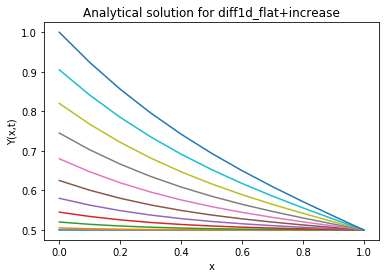

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
# plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 3993
         Function evaluations: 4276
         Gradient evaluations: 4276
12min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.1026218307658406e-05
 hess_inv: array([[ 3.67652940e+04,  2.18249974e+03, -5.76326498e+03, ...,
         2.02384234e+04,  2.14467282e+04, -1.22678658e+03],
       [ 2.18250026e+03,  6.76096080e+04,  8.45673545e+03, ...,
        -1.91213020e+04, -1.81468653e+04,  2.87557914e+01],
       [-5.76326406e+03,  8.45673343e+03,  1.36075615e+04, ...,
        -1.83639108e+04, -1.23812811e+04,  6.44897762e+02],
       ...,
       [ 2.02384226e+04, -1.91213051e+04, -1.83639102e+04, ...,
         9.31745589e+04,  1.16098805e+05, -6.57007827e+02],
       [ 2.14467282e+04, -1.81468734e+04, -1.23812803e+04, ...,
         1.16098803e+05,  1.69844764e+05, -8.02042994e+02],
       [-1.22678655e+03,  2.87557282e+01,  6.44897788e+02, ...,
        -6.570

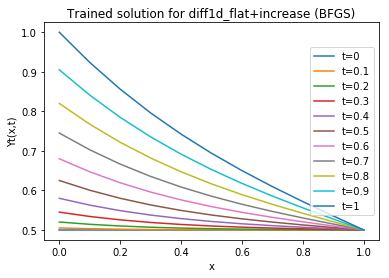

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

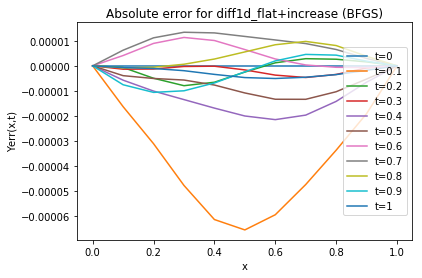

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

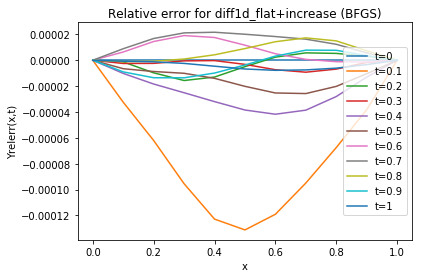

In [29]:
#Yrelerr1 = (Yt1[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
Yrelerr1 = (Yt1-Ya)/Ya
for i in range(nt):
    plt.plot(xt, Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [10]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

         Current function value: 0.000008
         Iterations: 8000
         Function evaluations: 8591
         Gradient evaluations: 8591
26min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 7.94676791544551e-06
 hess_inv: array([[ 1.83332287e+04,  8.74615625e+03,  1.15242860e+04, ...,
         1.81587322e+04,  2.37817778e+03,  5.64906840e+01],
       [ 8.74615590e+03,  2.65844866e+04,  4.50326908e+03, ...,
         1.71719638e+04,  8.76451685e+03,  1.20614544e+02],
       [ 1.15242852e+04,  4.50326901e+03,  8.68420521e+03, ...,
         6.21709269e+03,  3.54192518e+03,  1.11488242e+02],
       ...,
       [ 1.81587315e+04,  1.71719577e+04,  6.21709661e+03, ...,
         6.26217199e+04, -8.79907365e+03,  2.08113194e+02],
       [ 2.37818651e+03,  8.76452418e+03,  3.54192854e+03, ...,
        -8.79907052e+03,  6.63613718e+04,  3.26296446e+01],
       [ 5.64905261e+01,  1.20614400e+02,  1.11487995e+02, ...,
         2.08112783e+02,  3.26292574e+01,  1.14724632e

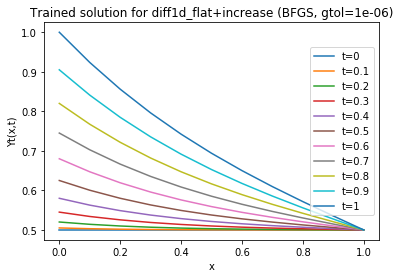

In [18]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

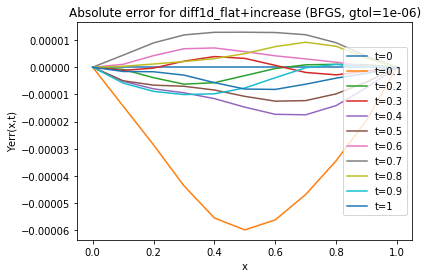

In [19]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

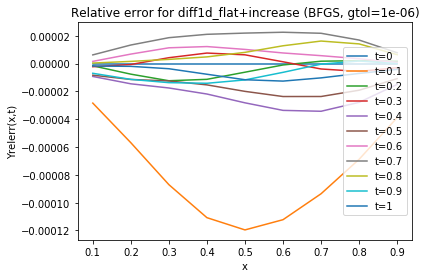

In [20]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-6, maxiter=16000)

In [14]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
options['maxiter'] = 16000
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

         Current function value: 0.000004
         Iterations: 16000
         Function evaluations: 17257
         Gradient evaluations: 17257
51min 59s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.5019476076967506e-06
 hess_inv: array([[ 6.17825625e+04, -3.03668229e+04,  3.17419693e+04, ...,
        -1.65868590e+05,  5.20458121e+05, -8.03187382e+03],
       [-3.03667921e+04,  4.58487343e+04, -1.53916469e+04, ...,
         1.12572380e+05, -2.91356326e+05,  5.18327062e+03],
       [ 3.17420022e+04, -1.53916790e+04,  2.04549461e+04, ...,
        -7.16546266e+04,  2.26755390e+05, -4.18574687e+03],
       ...,
       [-1.65868496e+05,  1.12572558e+05, -7.16544758e+04, ...,
         6.02242910e+05, -1.80922529e+06,  2.66886804e+04],
       [ 5.20457726e+05, -2.91356705e+05,  2.26754880e+05, ...,
        -1.80922516e+06,  5.87200262e+06, -7.94804691e+04],
       [-8.03187723e+03,  5.18327890e+03, -4.18574372e+03, ...,
         2.66887056e+04, -7.94805579e+04,  1.4767

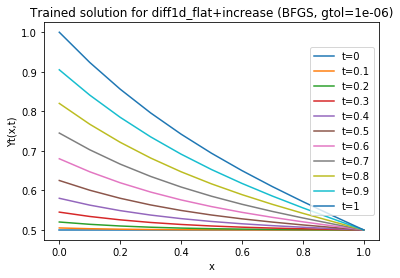

In [21]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

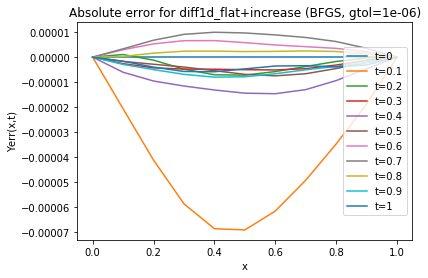

In [22]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

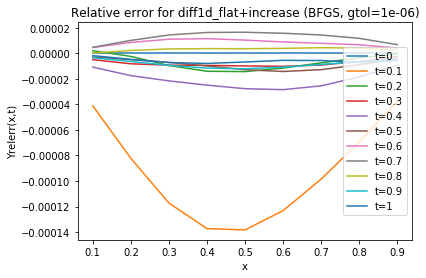

In [23]:
Yrelerr3 = (Yt3[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-6, maxiter=32000)

In [24]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
options['maxiter'] = 32000
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 17291
         Function evaluations: 18647
         Gradient evaluations: 18647
56min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.4399001772329806e-06
 hess_inv: array([[ 7.34587388e+04, -1.58004231e+04,  1.92979742e+04, ...,
        -2.04619809e+05,  5.18847832e+05, -3.24109422e+03],
       [-1.58004298e+04,  1.25427298e+05, -4.37174139e+03, ...,
         1.40634807e+05, -4.19204308e+05,  4.95429376e+03],
       [ 1.92979902e+04, -4.37169807e+03,  1.42209334e+04, ...,
        -7.97206633e+04,  1.32938729e+05, -1.41333370e+03],
       ...,
       [-2.04620424e+05,  1.40635302e+05, -7.97198524e+04, ...,
         3.11867624e+06, -3.89560663e+06, -5.97127615e+03],
       [ 5.18847677e+05, -4.19204362e+05,  1.32937104e+05, ...,
        -3.89559638e+06,  8.11719693e+06, -4.42444292e+04],
       [-3.24106597e+03,  4.95430299e+03, -1.41333113e+03, ...,
        -5.9

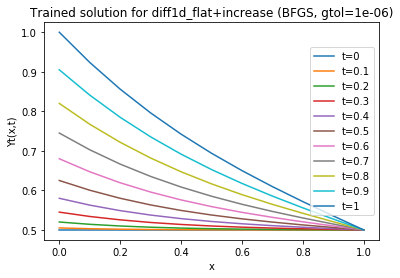

In [25]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

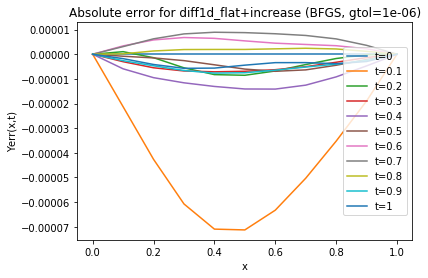

In [26]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

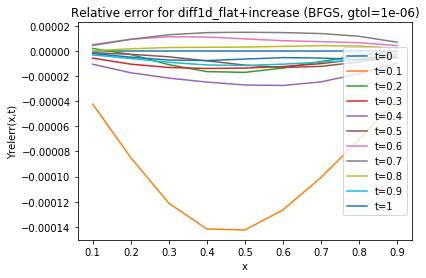

In [27]:
Yrelerr4 = (Yt4[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8, maxiter=32000)

In [28]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 32000
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

         Current function value: 0.000001
         Iterations: 26155
         Function evaluations: 28245
         Gradient evaluations: 28236
1h 22min 36s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 9.947376458063422e-07
 hess_inv: array([[ 2.06331390e+06, -3.23144972e+04,  1.35659254e+05, ...,
        -1.61849261e+06,  9.05889584e+06, -1.54288387e+06],
       [-3.22673681e+04,  1.09262452e+05, -1.11775200e+05, ...,
         5.23009805e+05, -4.05460053e+05,  1.48287638e+05],
       [ 1.35610840e+05, -1.11776936e+05,  1.30071983e+05, ...,
        -4.92021991e+05,  5.92918873e+05, -1.50233292e+05],
       ...,
       [-1.61769695e+06,  5.23074609e+05, -4.92068338e+05, ...,
         1.26406998e+07, -2.01784494e+07,  5.82510680e+06],
       [ 9.05848254e+06, -4.05685902e+05,  5.93143379e+05, ...,
        -2.01828317e+07,  7.32241739e+07, -1.49117242e+07],
       [-1.54266870e+06,  1.48324822e+05, -1.50267484e+05, ...,
         5.82565670e+06, -1.49107131e+07,  3.55

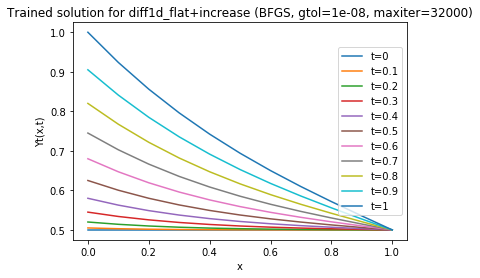

In [30]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

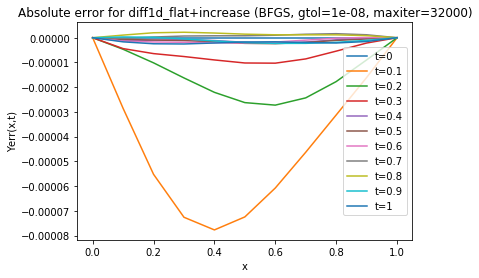

In [31]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

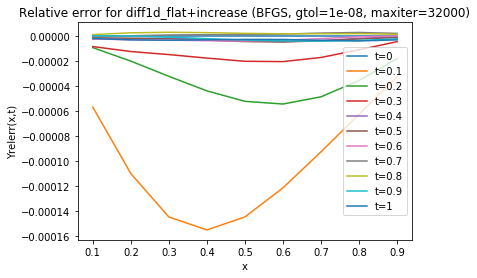

In [32]:
Yrelerr5 = (Yt5[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));